
see 
https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

In [231]:
import pandas as pd
import numpy as np
import csv
import glob
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

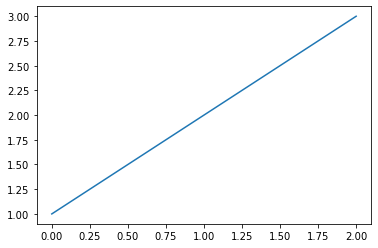

In [42]:
plt.plot([1,2,3])
plt.show()

In [43]:
m = [[1,2,3], [0.2,4,1], [1,1,1], [0.2,0.3,0.4]]

In [44]:
dm = [{"experiment":"a", "a":1,"b":2}, {"experiment":"b","a":2,"b":77}]
pd.DataFrame(dm).set_index(['experiment']) # df.set_index

,a,b
experiment,,
a,1,2
b,2,77


In [46]:
data = pd.DataFrame(m)

In [121]:
"""
ok things to have..
code? 
type of element?
origin?
index is ideally unique.
"""
filename = "../results/kee1results_0000_55506 KEE1 (1)@030721_191840.csv"

def read_csv_file(filename):
    with open(filename) as csvfile:
        reader = csv.reader(csvfile, delimiter=';')
        data = {}
        file = filename.split("/")[-1]
        method = file[:4]
        itembigname = file.split(" ")[0]
        item = itembigname.split("_",1)[-1]
        data["method"] = method
        data["item"] = item
        next(reader) # skip header
        for row in reader:
            element = row[0]
            line = row[1]
            elementname = f"{element}_{line}"
            area = row[4]
            data[elementname] = int(area)
    return data

In [117]:
def find_all_data_files(folder="../results"):
    return [x.replace("\\","/") for x in glob.glob(f"{folder}/*.csv")]

In [255]:
raw_data = []
for filename in find_all_data_files():
    raw_data.append(read_csv_file(filename))

In [256]:
df = pd.DataFrame(raw_data)

In [326]:
df_nocal = df[df['item'] != "Mn"]
element_columns = [col for col in df_nocal.columns if col not in ["method", "item"]]

In [316]:
wanted_elements = ["Fe", "Rb", "Sr", "Y", "Zr", "Nb", "Mn"] # "Th" dropped

In [317]:
to_drop = []
for col in element_columns:
    elm = col.split("_")[0]
    if elm not in wanted_elements:
        to_drop.append(col)

In [318]:
df_nocal_few_cols = df_nocal.drop(columns=to_drop).reset_index(drop=True)
df_nocal_few_cols.head()

,method,item,Mn_K12,Fe_K12,Rb_K12,Sr_K12,Y_K12,Zr_K12,Nb_K12
0,kee3,0000_68218_1,393,33660,603,11669,413,3090,240
1,kee3,0000_68218_1,662,40716,619,12495,448,3112,192
2,kee3,0000_68218_1,445,25454,559,12766,464,3499,252
3,kee3,0000_68218_1,715,35531,467,13539,405,2788,217
4,kee3,0001_2565,4239,34459,1691,16394,385,1464,133


In [298]:
def standardize_columns(df_, columns):
    """transform mean = 0 and variance = 1, assumes gaussian distribution of columns"""
    df = df_.copy()
    # Separating out the features
    x = df.loc[:, columns].values# Separating out the target
    # y = df.loc[:,['target']].values# Standardizing the features 
    x = StandardScaler().fit_transform(x)
    df.loc[:, columns] = x
    df['method'] = df_['method']
    df['item'] = df_['item']
    return df

In [299]:
def pca(df_, columns, n_components=None):
    pca_ = PCA(n_components=n_components)
    x = df_.loc[:, columns].values
    pca_.fit(x)
    df = pd.DataFrame(pca_.transform(x))
    df['method'] = df_['method']
    df['item'] = df_['item']
    # df = df.append(df_[['method', 'item']])
    return {"transformed":df, "model": pca_}

In [366]:
def explain_model(model: PCA):
    pc1, pc2 = model.components_
    print("components:\n", "pc1:", pc1, "\n", "pc2:", pc2)
    print("explained variance ratio:\n", model.explained_variance_ratio_)
    print("total variance in columns:", f"{sum(model.explained_variance_ratio_)*100:.2f}%")
    
def reverse_pca(result_dict):
    d = result_dict
    data = d['transformed'].copy()
    return d['model'].inverse_transform(data)

In [319]:
element_in_columns_ds = [col for col in df_nocal_few_cols.columns if col not in ["method", "item"]]

In [320]:
std_data= standardize_columns(df_nocal_few_cols, element_in_columns_ds) # maybe just kee1
std_data

,method,item,Mn_K12,Fe_K12,Rb_K12,Sr_K12,Y_K12,Zr_K12,Nb_K12
0,kee3,0000_68218_1,-0.514165,-0.370261,-1.819315,1.226852,0.060836,0.834852,0.815074
1,kee3,0000_68218_1,-0.425143,0.121187,-1.772919,1.459624,0.247839,0.859221,0.010665
2,kee3,0000_68218_1,-0.496956,-0.941807,-1.946903,1.535994,0.333325,1.287900,1.016176
3,kee3,0000_68218_1,-0.407603,-0.239947,-2.213678,1.753831,0.018093,0.500327,0.429628
4,kee3,0001_2565,0.758623,-0.314611,1.335588,2.558389,-0.088765,-0.966265,-0.978089
5,kee3,0001_2565,0.396246,-0.193699,1.901035,2.113416,0.183724,-0.903126,-1.464086
6,kee3,0001_2565,0.618305,-0.317397,1.271794,2.956582,-0.024650,-0.988419,0.060940
7,kee3,0001_2565,1.840459,0.243841,0.778840,1.896988,0.472241,-1.622022,-0.559126
8,kee3,0001_4952_1,1.982101,-0.725963,-1.332161,-0.418054,-0.334540,1.785257,-0.961330
9,kee3,0001_4952_1,3.499783,-0.504267,-1.300264,-0.456661,-0.265082,1.807411,0.815074


In [321]:
d = pca(std_data, element_in_columns_ds, n_components=2)
explain_model(d['model'])

components:
 [[-0.08546971 -0.46718671 -0.01449912 -0.20486873  0.43370441  0.49446584
   0.54740671]
 [ 0.42252713  0.13673913 -0.76056553 -0.05564411 -0.21523965  0.41366207
  -0.06142173]]
explained variance ratio:
 [0.40246611 0.19881051]
total variance in columns: 60.13%


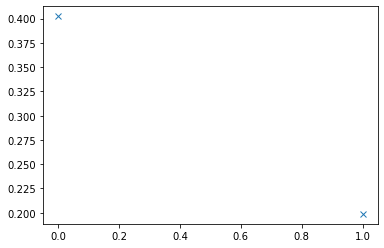

In [322]:
plt.plot(d['model'].explained_variance_ratio_, 'x')

In [323]:
d['transformed']

,0,1,method,item
0,0.877329,1.329752,kee3,0000_68218_1
1,0.244576,1.405566,kee3,0000_68218_1
2,1.533675,1.455114,kee3,0000_68218_1
3,0.310152,1.557707,kee3,0000_68218_1
4,-1.513051,-1.201168,kee3,0001_2565
5,-1.572243,-1.745729,kee3,0001_2565
6,-0.994785,-1.321258,kee3,0001_2565
7,-1.574439,-0.625201,kee3,0001_2565
8,0.486130,2.644228,kee3,0001_4952_1
9,1.273783,3.178797,kee3,0001_4952_1


In [221]:
reversed_data = reverse_pca(d)

ValueError: shapes (54,4) and (2,7) not aligned: 4 (dim 1) != 2 (dim 0)

In [223]:
d['transformed'].head()

,0,1,method,item
0,-1.257133,-1.666005,kee1,0000_55506
1,-1.672592,-1.562831,kee1,0000_55506
2,-1.006135,-1.735072,kee1,0000_55506
3,-1.612778,-1.637006,kee1,0000_55506
4,-1.471665,-1.727280,kee1,0000_55506


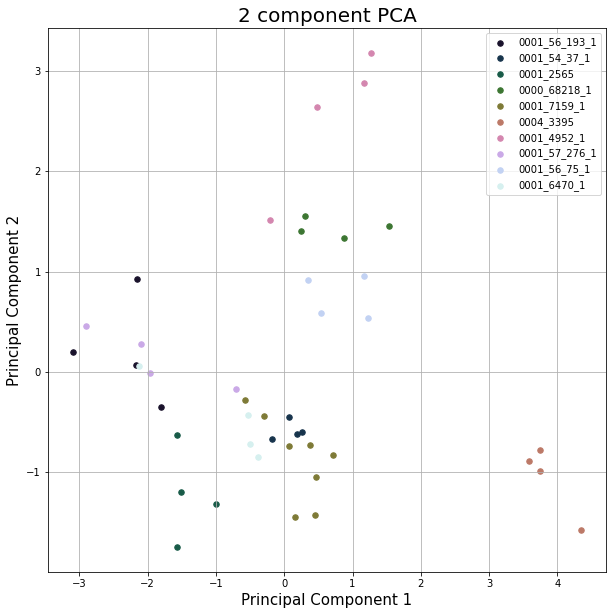

In [343]:
finalDf = d['transformed']
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = list(set(finalDf['item']))

sns.reset_orig() # get original matplotlib colors
clrs = sns.color_palette("cubehelix", n_colors=len(targets))


for i, target in enumerate(targets):
    indicesToKeep = finalDf['item'] == target
    lines = ax.scatter(finalDf.loc[indicesToKeep, 0]
               , finalDf.loc[indicesToKeep, 1]
               , s = 30)
    lines.set_color(clrs[i])
ax.legend(targets)
ax.grid()
#plt.savefig("kee3.svg")

In [374]:
def make_pca_and_plot(data, method, wanted_elements, filename=None):
    if wanted_elements is None:
        wanted_elements = ["Fe", "Rb", "Sr", "Y", "Zr", "Nb", "Mn"] # "Th" dropped
    element_columns = [col for col in data.columns if col not in ["method", "item"]]
    
    to_drop = []
    for col in element_columns:
        elm = col.split("_")[0]
        if elm not in wanted_elements:
            to_drop.append(col)
            
    df = data.drop(columns=to_drop).query(f"method == '{method}'").reset_index(drop=True)
    
    print("df:\n", df.head())
    
    element_in_columns_ds = [col for col in df.columns if col not in ["method", "item"]]
    std_data = standardize_columns(df, element_in_columns_ds)
    
    print("standardized:\n",std_data.head())
    
    d = pca(std_data, element_in_columns_ds, n_components=2)
    
    explain_model(d['model'])
    
    finalDf = d['transformed']
    fig = plt.figure(figsize = (10,10))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title('2 component PCA', fontsize = 20)
    plt.figtext(.5,0,", ".join(element_in_columns_ds), fontsize=18, ha='center')
    targets = list(set(finalDf['item']))

    sns.reset_orig() # get original matplotlib colors
    clrs = sns.color_palette("cubehelix", n_colors=len(targets))


    for i, target in enumerate(targets):
        indicesToKeep = finalDf['item'] == target
        lines = ax.scatter(finalDf.loc[indicesToKeep, 0]
                   , finalDf.loc[indicesToKeep, 1]
                   , s = 30)
        lines.set_color(clrs[i])
    ax.legend(targets)
    ax.grid()
    if filename:
        plt.savefig(filename)


df:
   method        item  Mn_K12  Fe_K12  Rb_K12  Sr_K12  Y_K12  Zr_K12  Nb_K12
0   kee1  0000_55506   13052  358034    6008   24781      0    2087     742
1   kee1  0000_55506   13314  398933    5959   24156      0     319     304
2   kee1  0000_55506   14403  427324    6205   25937    952    1271     857
3   kee1  0000_55506   12895  367624    5859   24123    663       0     205
4   kee1  0000_55506   11589  351634    5331   20648    675    1060     364
standardized:
   method        item    Mn_K12    Fe_K12    Rb_K12    Sr_K12     Y_K12  \
0   kee1  0000_55506 -0.495751 -1.483730 -1.050209 -0.631086 -0.473483   
1   kee1  0000_55506 -0.494977 -1.458454 -1.054286 -0.645959 -0.473483   
2   kee1  0000_55506 -0.491762 -1.440909 -1.033818 -0.603576 -0.001744   
3   kee1  0000_55506 -0.496215 -1.477804 -1.062607 -0.646745 -0.144950   
4   kee1  0000_55506 -0.500071 -1.487686 -1.106539 -0.729441 -0.139004   

     Zr_K12    Nb_K12  
0 -0.709212 -0.210833  
1 -0.933952 -0.723859  
2 -0.81

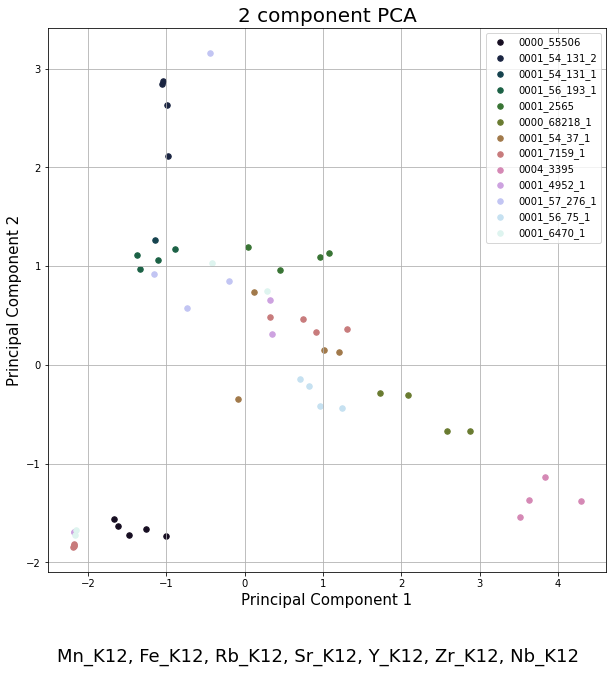

In [375]:
make_pca_and_plot(data=df_nocal, method="kee1", wanted_elements=None)